<a href="https://colab.research.google.com/github/shashwat9kumar/US-Accidents-Data-Analysis/blob/master/Analysis_of_US_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Accidents (3 Million records)

Link to kaggle dataset: https://www.kaggle.com/sobhanmoosavi/us-accidents

## Downloading the data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/Kaggle/US_Accidents
!ls

/content/gdrive/My Drive/Kaggle/US_Accidents
kaggle.json


In [ ]:
!kaggle datasets download -d sobhanmoosavi/us-accidents

100% 290M/290M [00:03<00:00, 71.8MB/s]
100% 290M/290M [00:03<00:00, 83.6MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip
!ls

Archive:  us-accidents.zip
  inflating: US_Accidents_Dec20_Updated.csv  
kaggle.json  US_Accidents_Dec20_Updated.csv


Referring the filepath

In [ ]:
data_filepath = "/content/gdrive/MyDrive/Kaggle/US_Accidents/US_Accidents_Dec20_Updated.csv"

## Data Preparation and Cleaning


* Load the file
* Become one with the data
* Fix missingg/incorrect/null data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(data_filepath)
df.head(10)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.000,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.000,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.400,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.000,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.000,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,3,2018-10-17 16:40:36,2018-10-17 17:10:18,35.348240,-80.847221,35.348240,-80.847221,0.000,Three lanes blocked due to accident on I-77 No...,NaN,W W.T. Harris Blvd,R,Charlotte,Mecklenburg,NC,28269,US,US/Eastern,KJQF,2018-10-17 16:58:00,73.4,NaN,33.0,30.17,10.0,NNW,6.9,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,4,2019-12-12 09:48:52,2019-12-12 10:18:05,39.523970,-107.777000,39.565780,-107.516950,14.153,Closed between CO-13/Taughenbaugh Blvd/Exit 90...,NaN,I-70 E,R,Rifle,Garfield,CO,81650,US,US/Mountain,KRIL,2019-12-12 09:46:00,28.0,28.0,88.0,24.67,2.0,NE,3.0,0.0,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,2,2019-12-21 23:59:00,2019-12-22 00:32:06,34.034017,-118.026972,34.034017,-118.026972,0.000,At CA-60/Pomona Fwy - Accident.,NaN,CA-60 W,R,Whittier,Los Angeles,CA,90601,US,US/Pacific,KEMT,2019-12-21 23:53:00,55.0,55.0,40.0,29.86,10.0,E,5.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
8,A-9,2,2018-05-23 16:50:24,2018-05-23 22:50:24,35.863490,-86.831680,35.849480,-86.832530,0.969,At TN-248/Peytonsville Rd/Exit 61 - Accident. ...,425.0,Old Peytonsville Rd,R,Franklin,Williamson,TN,37064-5029,US,US/Central,KBNA,2018-05-23 16:53:00,87.1,NaN,43.0,30.04,10.0,NE,8.1,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,2,2019-01-30 08:44:18,2019-01-30 09:14:17,34.426330,-118.585100,34.420220,-118.581900,0.460,At Magic Mountain

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

Number of rows and columns

In [ ]:
print("Number of columns: ",len(df.columns))
print("Number of rows: ",len(df))

Number of columns:  47
Number of rows:  2906610


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


How many columns are numerical data?


In [ ]:
len(df.select_dtypes(['int64', 'float64']).columns)

14

Missing or incorrect values?

In [ ]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                   282821
End_Lng                   282821
Distance(mi)                   0
Description                    0
Number                   1891672
Street                         0
Side                           0
City                         108
County                         0
State                          0
Zipcode                     1114
Country                        0
Timezone                    3430
Airport_Code                6608
Weather_Timestamp          46917
Temperature(F)             67224
Wind_Chill(F)            1183859
Humidity(%)                71270
Pressure(in)               56908
Visibility(mi)             72078
Wind_Direction             63474
Wind_Speed(mph)           307163
Precipitation(in)        1301326
Weather_Condition          71851
Amenity   

In [ ]:
df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                   282821
End_Lng                   282821
Distance(mi)                   0
Description                    0
Number                   1891672
Street                         0
Side                           0
City                         108
County                         0
State                          0
Zipcode                     1114
Country                        0
Timezone                    3430
Airport_Code                6608
Weather_Timestamp          46917
Temperature(F)             67224
Wind_Chill(F)            1183859
Humidity(%)                71270
Pressure(in)               56908
Visibility(mi)             72078
Wind_Direction             63474
Wind_Speed(mph)           307163
Precipitation(in)        1301326
Weather_Condition          71851
Amenity   

Percantage of missing columns per columns?

In [ ]:
df.isna().sum().sort_values(ascending=False) * 100. / len(df)

Number                   65.081728
Precipitation(in)        44.771263
Wind_Chill(F)            40.729888
Wind_Speed(mph)          10.567740
End_Lat                   9.730270
End_Lng                   9.730270
Visibility(mi)            2.479796
Weather_Condition         2.471986
Humidity(%)               2.451997
Temperature(F)            2.312797
Wind_Direction            2.183781
Pressure(in)              1.957882
Weather_Timestamp         1.614148
Airport_Code              0.227344
Timezone                  0.118007
Zipcode                   0.038326
Nautical_Twilight         0.003784
Astronomical_Twilight     0.003784
Civil_Twilight            0.003784
Sunrise_Sunset            0.003784
City                      0.003716
Amenity                   0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
Distance(mi)              0.000000
Description         

Plotting the missing percentages

In [ ]:
# Plotting a Pandas.Series data
missing_data = df.isna().sum().sort_values(ascending=False) * 100. / len(df)

In [ ]:
type(missing_data) # we can directly plot the Pandas.Series using plot()

pandas.core.series.Series

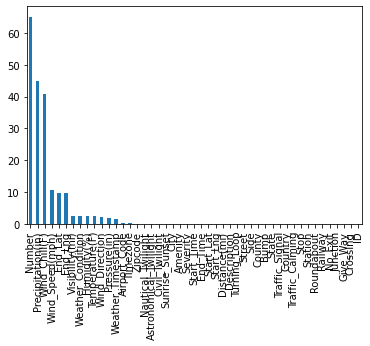

In [ ]:
missing_data.plot(kind='bar')

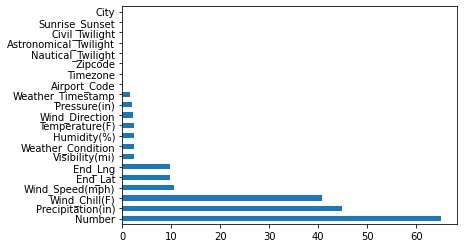

In [ ]:
missing_data[missing_data!=0].plot(kind='barh')

When a value is missing more than 50% of the time its probably better to avoid using it, because it would not make much impact on the overall data

Removing the columns that we do not want to use

## EDA

Columns we will analyze:
1. City
2. Start time
3. Start Lat
4. Start Long
5. Temperature
6. Weather Conditions
7. Humidity


In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

The 'City' column

In [ ]:
df.City.unique()

array(['Greenville', 'Charlotte', 'Los Gatos', ..., 'Allons', 'Adolphus',
       'Gowanda'], dtype=object)

In [ ]:
cities = df.City.unique()
len(cities)

11790

In [ ]:
cities_by_accident = df.City.value_counts()
cities_by_accident[:20]

Los Angeles      68411
Houston          68265
Charlotte        56176
Miami            49965
Dallas           48525
Austin           38808
Raleigh          31355
Atlanta          29244
Sacramento       28984
Orlando          28092
Nashville        25277
Baton Rouge      25080
Minneapolis      22469
San Diego        22329
Phoenix          21370
Oklahoma City    21292
Portland         19432
Richmond         18343
Seattle          17384
Saint Paul       17266
Name: City, dtype: int64

Being the highes populated city New york is not in top accidents city

In [ ]:
'New York' in cities

True

In [ ]:
cities_by_accident["New York"]

7328

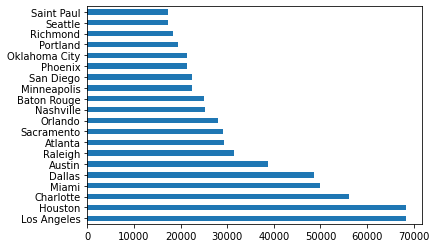

In [ ]:
cities_by_accident[:20].plot(kind='barh')

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


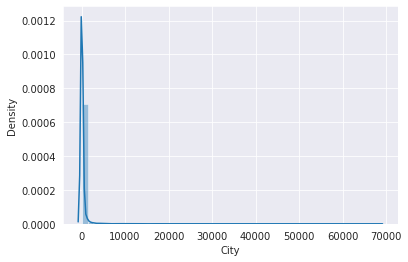

In [ ]:
sns.distplot(cities_by_accident)

In [ ]:
high_accident_cities = cities_by_accident[cities_by_accident >=1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [ ]:
len(high_accident_cities) / len(cities_by_accident)

0.04351514123335313

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


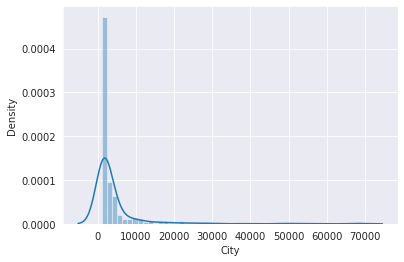

In [ ]:
sns.distplot(high_accident_cities)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


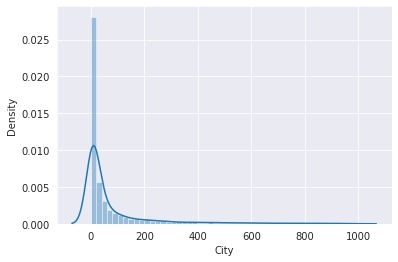

In [ ]:
sns.distplot(low_accident_cities)

We see that in all plots we did of accidents, there is almost an exponential decay. So it must follow some exponential functions. And exponential functions are difficult to plot, so we can plot it on some logarathmic scale

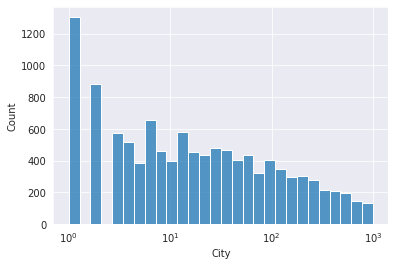

In [ ]:
sns.histplot(low_accident_cities, log_scale=True)

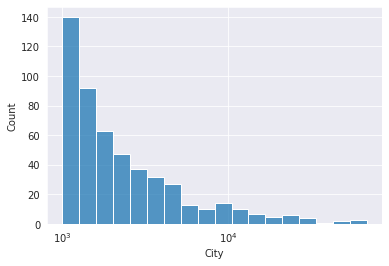

In [ ]:
sns.histplot(high_accident_cities, log_scale=True)

In [ ]:
cities_by_accident[cities_by_accident == 1]

Smiths Grove     1
Omar             1
North Venice     1
Pleasant City    1
Hartwick         1
                ..
Dana             1
Marcola          1
Leonardville     1
Brigantine       1
Hackberry        1
Name: City, Length: 1306, dtype: int64